In [2]:
import _pickle as cPickle
import json
import sunpy
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

font = {'family' : 'Open Sans',
        'weight' : 'normal',
        'size'   : 15}

import matplotlib as mpl
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#import sunpy.visualization.colormaps as cm
#magmap = mpl.colormaps['hmimag']

from datetime import datetime as dt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d/%m %H:%M')

/scratch/slam/sinjan/.conda/envs/p310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dates = [12,13,14,15,16,17]

num_files = int(len(os.listdir('/scratch/slam/sinjan/arlongterm_hmi/blos_45/')))

In [4]:
folder = '/data/slam/sinjan/arlongterm_pickles_hann_SL/'

In [7]:
def get_hrt_hmi_arr_from_pickles(folder, hrt_series, hmi_series, hrt_psf, hrt_suffix = '', hmi_suffix = '', year = '2023'):
    start = 0
    dates = [12,13,14,15,16,17]
    num_files = 129

    hrt_arr = np.zeros((4102,4102,num_files))
    hmi_arr = np.zeros((4102,4102,num_files))

    hrt_meta_list = []
    
    for i in dates:
        if i == 17:
            endhour = '11'
            endmin = '02'
            endday = 17
        else:
            endhour = '00'
            endmin = '00'
            endday = i+1
        with open(folder+f"HRTs_{hrt_series}_remapped_on_HMI_{year}10{i}T000000_{year}10{endday}T{endhour}{endmin}00{hrt_psf}.pickle{hrt_suffix}", "rb") as input_file:
            hrt_tmps = cPickle.load(input_file)
        
        with open(folder+f"HMIs_{hmi_series}_{year}10{i}T000000_{year}10{endday}T{endhour}{endmin}00.pickle{hmi_suffix}", "rb") as input_file:
            hmi_tmps = cPickle.load(input_file)
            
        for i,smap in enumerate(hrt_tmps):
            hrt_arr[:,:,start+i] = smap.data
            hrt_meta_list.append(smap.meta)
    
        for i,smap in enumerate(hmi_tmps): #could zip together the two for loops, but need iterable
            nans=np.isnan(hrt_arr[:,:,start+i])
            tmp = smap.data
            tmp[nans] = np.nan
            hmi_arr[:,:,start+i] = tmp
            
        start += len(hrt_tmps)

    return hrt_arr, hmi_arr, hrt_meta_list

In [8]:
#m_45s with psf applied and straylight
folder = '/data/slam/sinjan/arlongterm_pickles_hann_SL/'
hrt_series = 'blos'
hmi_series = 'm_45s'
hrt_psf = '_hmipsf_True'
hrt_arr,hmi_arr,hrt_meta_list =  get_hrt_hmi_arr_from_pickles(folder, hrt_series, hmi_series, hrt_psf, hrt_suffix = '', hmi_suffix = '', year = '2023')

In [9]:
# load MU pickles

##DOESN'T LOAD, AS MOST LIKELY A DIFFERENT VERSION OF NUMPY WAS USED TO MAKE THIS PICKLE

##NEVER CHANGE THE PY310 KERNEL/VIRTUAL ENV SO THESE PICKLES CAN ALWAYS BE LOADED IN FUTURE
#hrt_mu_arr=np.load('/data/slam/sinjan/arlongterm_pickles/hrt_mu_20231012_20231017.pickle',allow_pickles=True)

with open('/data/slam/sinjan/arlongterm_pickles_hann_SL/hrt_mu_arr.npy','rb') as f:
    hrt_mu_arr=np.load(f)

with open('/data/slam/sinjan/arlongterm_pickles_hann_SL/hmi_mu_arr.npy','rb') as f:
    hmi_mu_arr=np.load(f)
#with open('/data/slam/sinjan/arlongterm_pickles/hrt_mu_20231012_20231017.pickle','rb') as f:
#    hrt_mu_arr=cPickle.load(f)

#with open('/data/slam/sinjan/arlongterm_pickles/hmi_mu_20231012_20231017.pickle','rb') as f:
#    hmi_mu_arr=cPickle.load(f)

In [13]:
times = [dt.strptime(i['date-obs'][:-4],'%Y-%m-%dT%H:%M:%S') for i in hrt_meta_list]

In [14]:
times

[datetime.datetime(2023, 10, 12, 0, 20, 44),
 datetime.datetime(2023, 10, 12, 1, 20, 44),
 datetime.datetime(2023, 10, 12, 2, 20, 44),
 datetime.datetime(2023, 10, 12, 3, 20, 44),
 datetime.datetime(2023, 10, 12, 4, 20, 44),
 datetime.datetime(2023, 10, 12, 5, 20, 44),
 datetime.datetime(2023, 10, 12, 6, 20, 44),
 datetime.datetime(2023, 10, 12, 7, 20, 44),
 datetime.datetime(2023, 10, 12, 8, 20, 44),
 datetime.datetime(2023, 10, 12, 9, 20, 44),
 datetime.datetime(2023, 10, 12, 10, 19, 59),
 datetime.datetime(2023, 10, 12, 11, 19, 59),
 datetime.datetime(2023, 10, 12, 12, 19, 59),
 datetime.datetime(2023, 10, 12, 13, 19, 59),
 datetime.datetime(2023, 10, 12, 14, 19, 59),
 datetime.datetime(2023, 10, 12, 15, 19, 59),
 datetime.datetime(2023, 10, 12, 16, 19, 59),
 datetime.datetime(2023, 10, 12, 17, 19, 59),
 datetime.datetime(2023, 10, 12, 18, 19, 59),
 datetime.datetime(2023, 10, 12, 19, 19, 59),
 datetime.datetime(2023, 10, 12, 20, 19, 59),
 datetime.datetime(2023, 10, 12, 21, 19, 59)

In [20]:
len(times)

128

In [15]:
hmi_vr = [round(i['obs_vr']/1000,3) for i in hrt_meta_list]

In [16]:
all_files = []
for i in dates:
    path = f'/data/solo/phi/data/fmdb/public/l2/2023-10-{i}/'
    files = os.listdir(path)
    blos_files = [f for f in files if 'blos' in f and 'hrt' in f]
    blos_files.sort()
    blos_fps = [os.path.join(path,f) for f in blos_files]
    all_files += blos_fps

In [17]:
hrt_dist = []
for f in all_files[:-56]:
    h = fits.getheader(f)
    hrt_dist.append(round(float(h['DSUN_AU']),3))

In [18]:
with open('/data/slam/sinjan/arlongterm_pickles_hann_SL/hmi_ic_cutout_20231012_20231017.pickle','rb') as f:
    hmi_ic_arr = cPickle.load(f)

In [41]:
#ic_45s with psf applied and straylight
folder = '/data/slam/sinjan/arlongterm_pickles_hann_SL/'
hrt_series = 'icnt'
hmi_series = 'ic_45s'
hrt_psf = '_hmipsf_True'
hrt_ic_arr,_,_ =  get_hrt_hmi_arr_from_pickles(folder, hrt_series, hmi_series, hrt_psf, hrt_suffix = '', hmi_suffix = '', year = '2023')

In [42]:
hrt_arr.shape

(4102, 4102, 129)

In [16]:
hmi_ic_arr.shape

(4102, 4102, 129)

In [19]:
tmp_ichrt=[]
tmp_ichmi=[]

tmp_sichrt=[]
tmp_sichmi=[]

hrt_mus=[]
hmi_mus=[]

tmp_ichrtmu=[]
tmp_ichmimu=[]

for i in range(128):
    tmp = hmi_ic_arr[:,:,i]
    fac = np.mean(tmp[~np.isnan(tmp)])
    hmi_umbra=np.where(tmp/fac<=0.55)
    
    hrt_noise=np.where(np.abs(hrt_arr[:,:,i][hmi_umbra])>50)
    hmi_noise=np.where(np.abs(hmi_arr[:,:,i][hmi_umbra])>50)
    
    tmp_ichrt.append(np.sum(np.abs(hrt_arr[:,:,i][hmi_umbra][hrt_noise])))
    tmp_ichmi.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise])))
    
    tmp_sichrt.append(np.sum(hrt_arr[:,:,i][hmi_umbra][hrt_noise]))
    tmp_sichmi.append(np.sum(hmi_arr[:,:,i][hmi_umbra][hmi_noise]))
    
    hrt_mu=hrt_mu_arr[:,:,i][hmi_umbra][hrt_noise]
    hmi_mu=hmi_mu_arr[:,:,i][hmi_umbra][hmi_noise]
    
    hrt_mus.append(np.mean(hrt_mu))
    hmi_mus.append(np.mean(hmi_mu))
    
    tmp_ichrtmu.append(np.sum(np.abs(hrt_arr[:,:,i][hmi_umbra][hrt_noise]/hrt_mu)))
    tmp_ichmimu.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise]/hmi_mu)))

tmp_ichrt=np.array(tmp_ichrt)
tmp_ichmi=np.array(tmp_ichmi)

tmp_sichrt=np.array(tmp_sichrt)
tmp_sichmi=np.array(tmp_sichmi)

hrt_mus=np.array(hrt_mus)
hmi_mus=np.array(hmi_mus)
tmp_ichrtmu=np.array(tmp_ichrtmu)
tmp_ichmimu=np.array(tmp_ichmimu)

In [134]:
hrt_mus[60:70]

array([0.86541563, 0.86262776, 0.85978076, 0.85678725, 0.85368747,
       0.85054205, 0.84732221, 0.84402779, 0.8410628 , 0.83742584])

In [135]:
hmi_mus[60:70]

array([0.8092096 , 0.81462261, 0.81984038, 0.82523441, 0.83064105,
       0.83598821, 0.84125057, 0.8464313 , 0.85122944, 0.85659404])

In [20]:
hmisize=2.42407e-6*1.496e8*1e5

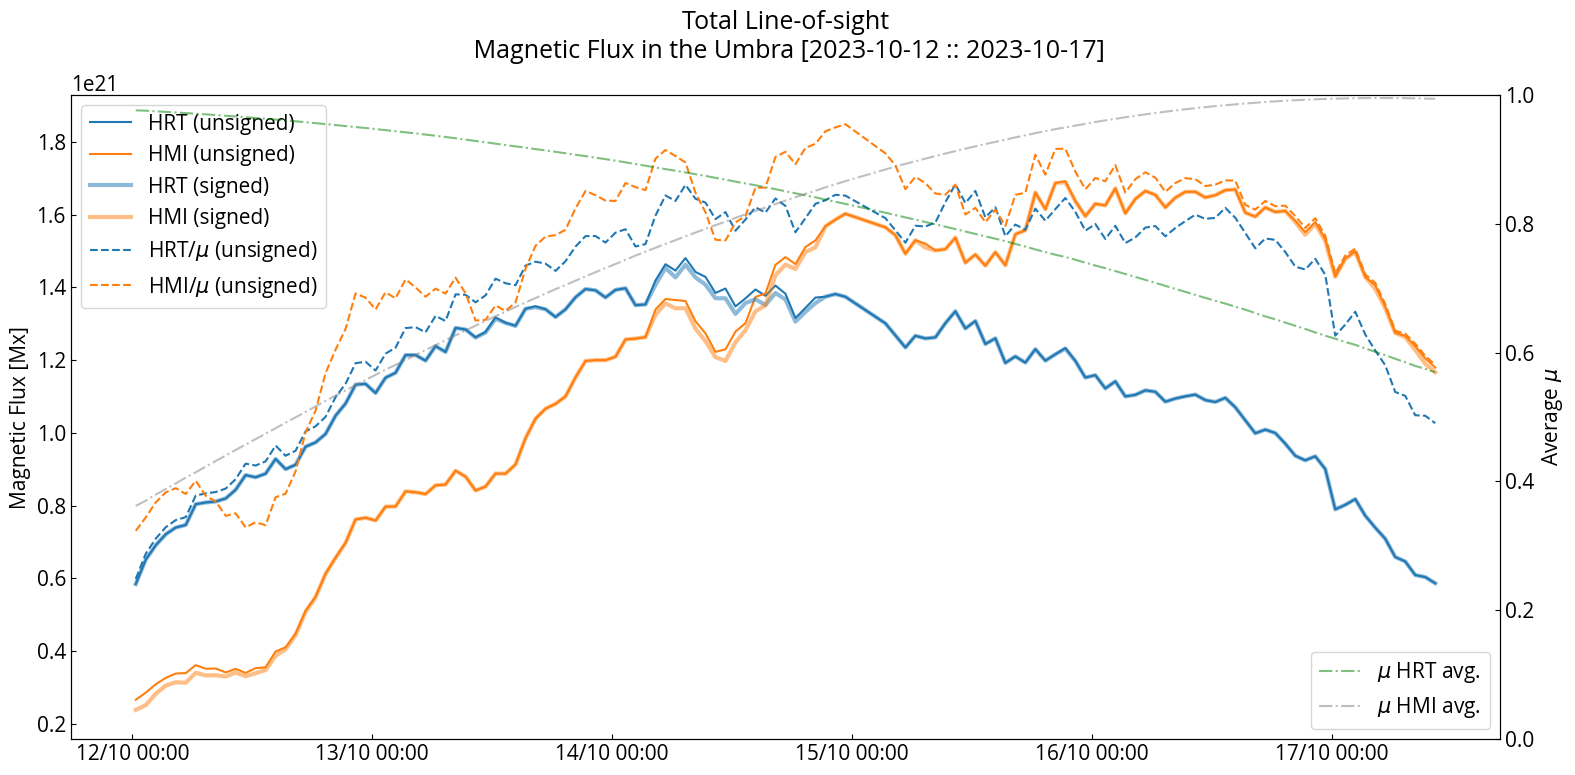

In [23]:
plt.figure(figsize=(16,8))
plt.plot(times,tmp_ichrt*hmisize**2,label=r'HRT (unsigned)',color='#1f77b4')
plt.plot(times,tmp_ichmi*hmisize**2,label=r'HMI (unsigned)',color='#ff7f0e')

plt.plot(times,tmp_sichrt*hmisize**2,label=r'HRT (signed)',color='#1f77b4',linewidth=3,alpha=0.5)
plt.plot(times,tmp_sichmi*hmisize**2,label=r'HMI (signed)',color='#ff7f0e',linewidth=3,alpha=0.5)

plt.plot(times,tmp_ichrtmu*hmisize**2,label=r'HRT/$\mu$ (unsigned)',color='#1f77b4',linestyle='--')
plt.plot(times,tmp_ichmimu*hmisize**2,label=r'HMI/$\mu$ (unsigned)',color='#ff7f0e',linestyle='--')

plt.ylabel('Magnetic Flux [Mx]')
plt.legend(loc='upper left')
ax=plt.gca()
ax2=ax.twinx()

ax2.plot(times,hrt_mus,label='$\mu$ HRT avg.', color='green',alpha=0.5,linestyle='-.')
ax2.plot(times,hmi_mus,label='$\mu$ HMI avg.', color='grey',alpha=0.5,linestyle='-.')
#ax2.plot(times,hrt_dist[:-1],label='HRT Dist [AU]',color='blue',alpha=0.5)
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title(f'Total Line-of-sight\n Magnetic Flux in the Umbra [{times[0].date()} :: {times[-1].date()}]\n')
plt.ylabel(r'Average $\mu$')
plt.xlabel('Time [UTC]')
ax=plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [29]:
hmi_vr_vrot = [i+1.997*np.sqrt(1-mu**2) for i,mu in zip(hmi_vr,hmi_mus)] #- if sun is moving towards HMI, the sign disappears from the sqrt, so be CAREFUL

Text(0.5, 0, 'Time [UTC]')

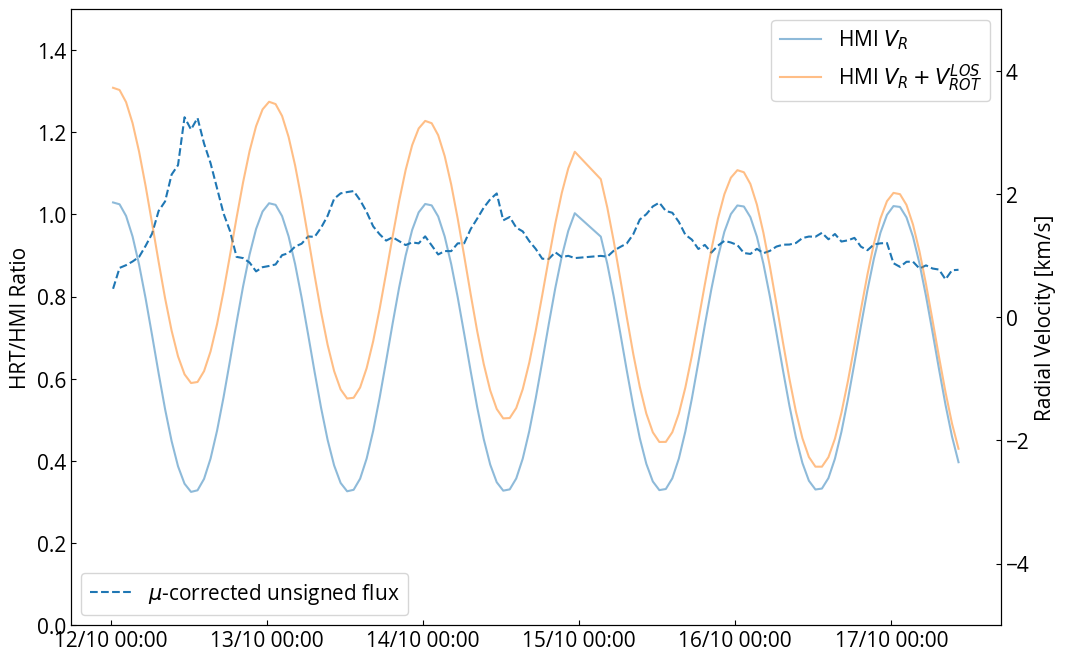

In [31]:
plt.figure(figsize=(12,8))
plt.plot(times,tmp_ichrtmu/tmp_ichmimu,label=r'$\mu$-corrected unsigned flux',linestyle='--')
#plt.plot(times,tmp_ichrt/tmp_ichmi,label=r'unsigned flux',linestyle='--')
#plt.plot(times,tmp_sichrt/tmp_sichmi,label=r'signed flux',linestyle='--')
plt.ylabel('HRT/HMI Ratio')
plt.legend(loc='lower left')
plt.ylim(0,1.5)
ax=plt.gca()
ax2=ax.twinx()
ax2.plot(times,hmi_vr,label=r'HMI $V_{R}$',alpha=0.5)
ax2.plot(times,hmi_vr_vrot,label=r'HMI $V_{R} + V_{ROT}^{LOS}$',alpha=0.5)
ax2.set_ylabel(r'Radial Velocity [km/s]')
ax2.set_ylim(-5,5)
ax.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.xlabel('Time [UTC]')

In [26]:
np.mean(tmp_ichrtmu/tmp_ichmimu)

0.9485628510819075

In [28]:
np.std(tmp_ichrtmu/tmp_ichmimu)/np.sqrt(128)

0.006509957735173039

In [34]:
tmp_ichrt_roll=[]
tmp_ichmi_roll=[]

tmp_sichrt_roll=[]
tmp_sichmi_roll=[]

hrt_mus_roll=[]
hmi_mus_roll=[]

tmp_ichrtmu_roll=[]
tmp_ichmimu_roll=[]

for i in range(128):
    tmp = hmi_ic_arr[:,:,i]
    fac = np.mean(tmp[~np.isnan(tmp)])
    hmi_umbra=np.where(tmp/fac<=0.55)

    tmp_hrt = hrt_arr[:,:,i]
    tmp_hrt_mu = hrt_mu_arr[:,:,i]
    if i > 72:
        tmp_hrt = np.roll(hrt_arr[:,:,i],-1,axis=1)
        tmp_hrt_mu = np.roll(hrt_mu_arr[:,:,i],-1,axis=1)
    elif i > 92:
        tmp_hrt = np.roll(hrt_arr[:,:,i],-2,axis=1)
        tmp_hrt_mu = np.roll(hrt_mu_arr[:,:,i],-2,axis=1)
    elif i > 116:
        tmp_hrt=np.roll(hrt_arr[:,:,i],-3,axis=1)
        tmp_hrt_mu = np.roll(hrt_mu_arr[:,:,i],-3,axis=1)
    
    hrt_noise=np.where(np.abs(tmp_hrt[hmi_umbra])>50)
    hmi_noise=np.where(np.abs(hmi_arr[:,:,i][hmi_umbra])>50)
    
    tmp_ichrt_roll.append(np.sum(np.abs(tmp_hrt[hmi_umbra][hrt_noise])))
    tmp_ichmi_roll.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise])))
    
    tmp_sichrt_roll.append(np.sum(tmp_hrt[hmi_umbra][hrt_noise]))
    tmp_sichmi_roll.append(np.sum(hmi_arr[:,:,i][hmi_umbra][hmi_noise]))
    
    hrt_mu=tmp_hrt_mu[hmi_umbra][hrt_noise]
    hmi_mu=hmi_mu_arr[:,:,i][hmi_umbra][hmi_noise]
    
    hrt_mus_roll.append(np.mean(hrt_mu))
    hmi_mus_roll.append(np.mean(hmi_mu))
    
    tmp_ichrtmu_roll.append(np.sum(np.abs(tmp_hrt[hmi_umbra][hrt_noise]/hrt_mu)))
    tmp_ichmimu_roll.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise]/hmi_mu)))

tmp_ichrt_roll=np.array(tmp_ichrt_roll)
tmp_ichmi_roll=np.array(tmp_ichmi_roll)

tmp_sichrt_roll=np.array(tmp_sichrt_roll)
tmp_sichmi_roll=np.array(tmp_sichmi_roll)

hrt_mus_roll=np.array(hrt_mus_roll)
hmi_mus_roll=np.array(hmi_mus_roll)
tmp_ichrtmu_roll=np.array(tmp_ichrtmu_roll)
tmp_ichmimu_roll=np.array(tmp_ichmimu_roll)

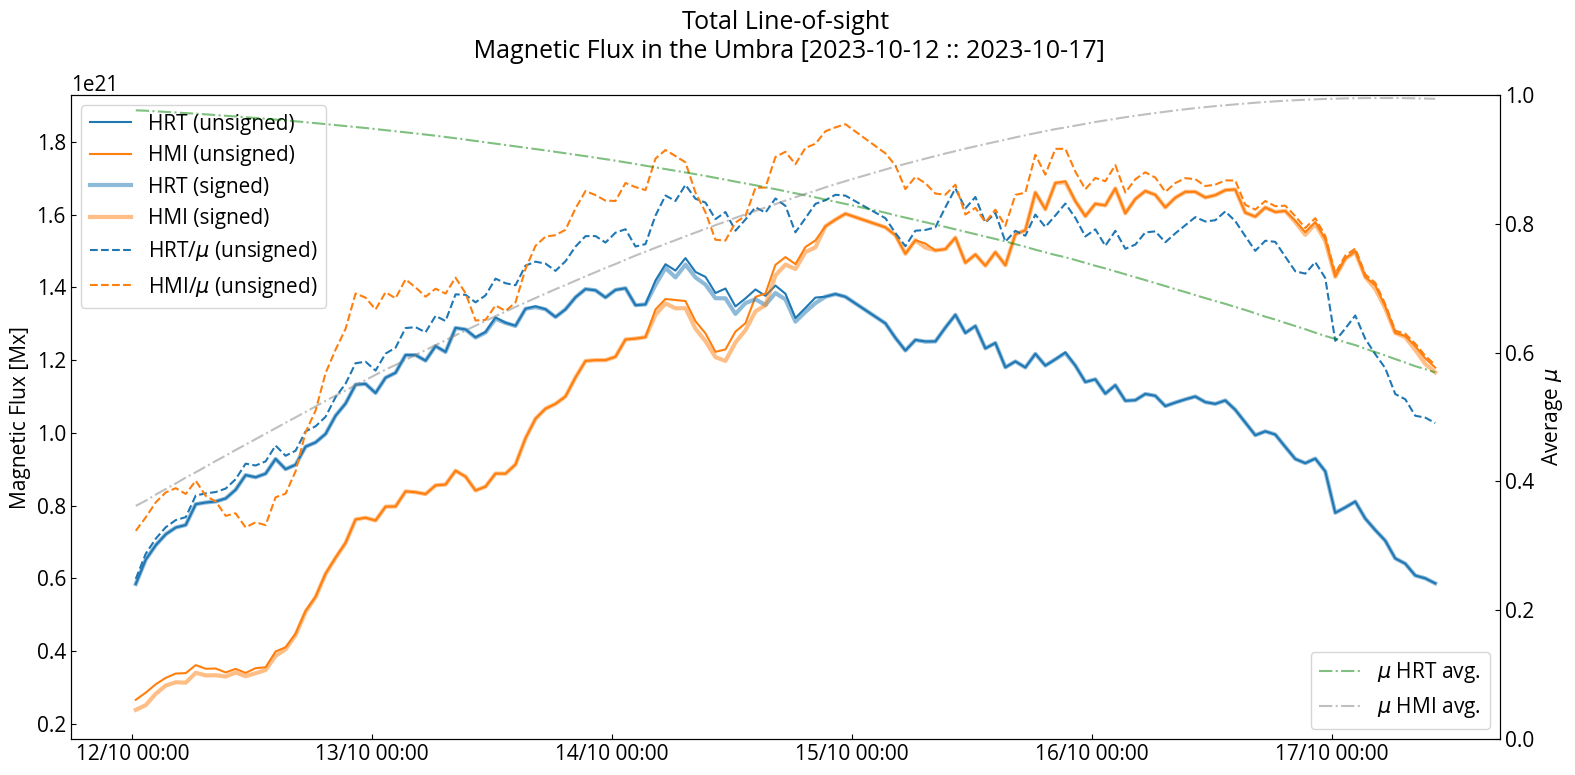

In [35]:
plt.figure(figsize=(16,8))
plt.plot(times,tmp_ichrt_roll*hmisize**2,label=r'HRT (unsigned)',color='#1f77b4')
plt.plot(times,tmp_ichmi_roll*hmisize**2,label=r'HMI (unsigned)',color='#ff7f0e')

plt.plot(times,tmp_sichrt_roll*hmisize**2,label=r'HRT (signed)',color='#1f77b4',linewidth=3,alpha=0.5)
plt.plot(times,tmp_sichmi_roll*hmisize**2,label=r'HMI (signed)',color='#ff7f0e',linewidth=3,alpha=0.5)

plt.plot(times,tmp_ichrtmu_roll*hmisize**2,label=r'HRT/$\mu$ (unsigned)',color='#1f77b4',linestyle='--')
plt.plot(times,tmp_ichmimu_roll*hmisize**2,label=r'HMI/$\mu$ (unsigned)',color='#ff7f0e',linestyle='--')

plt.ylabel('Magnetic Flux [Mx]')
plt.legend(loc='upper left')
ax=plt.gca()
ax2=ax.twinx()

ax2.plot(times,hrt_mus_roll,label='$\mu$ HRT avg.', color='green',alpha=0.5,linestyle='-.')
ax2.plot(times,hmi_mus_roll,label='$\mu$ HMI avg.', color='grey',alpha=0.5,linestyle='-.')
#ax2.plot(times,hrt_dist,label='HRT Dist [AU]',color='blue',alpha=0.5)
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title(f'Total Line-of-sight\n Magnetic Flux in the Umbra [{times[0].date()} :: {times[-1].date()}]\n')
plt.ylabel(r'Average $\mu$')
plt.xlabel('Time [UTC]')
ax=plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Time [UTC]')

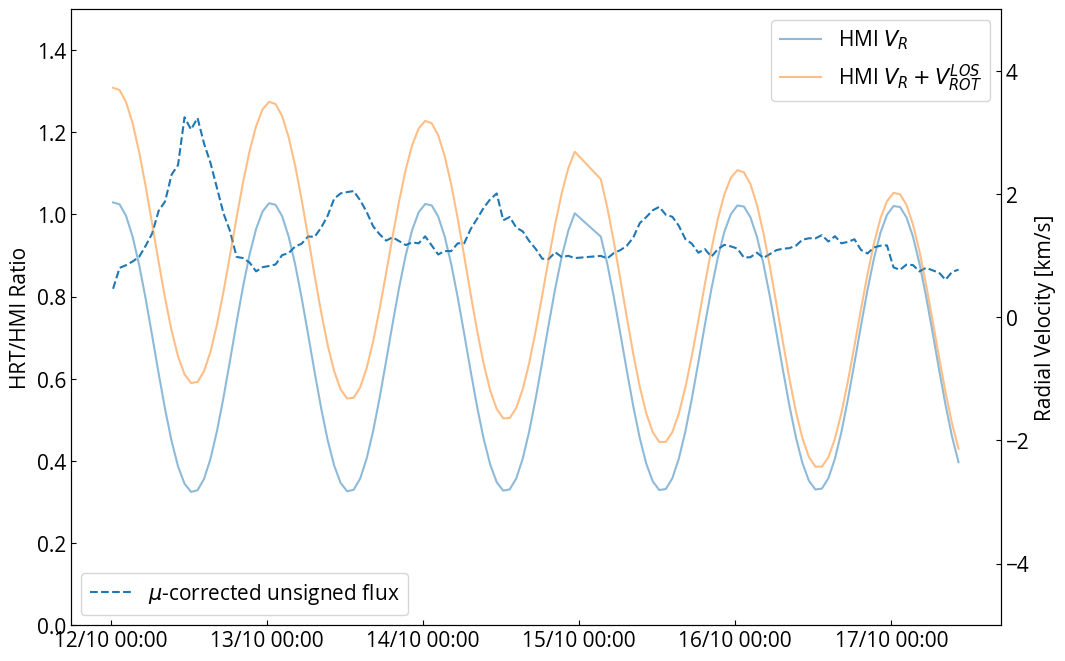

In [36]:
plt.figure(figsize=(12,8))
plt.plot(times,tmp_ichrtmu_roll/tmp_ichmimu_roll,label=r'$\mu$-corrected unsigned flux',linestyle='--')
#plt.plot(times,tmp_ichrt/tmp_ichmi,label=r'unsigned flux',linestyle='--')
#plt.plot(times,tmp_sichrt/tmp_sichmi,label=r'signed flux',linestyle='--')
plt.ylabel('HRT/HMI Ratio')
plt.legend(loc='lower left')
plt.ylim(0,1.5)
ax=plt.gca()
ax2=ax.twinx()
ax2.plot(times,hmi_vr,label=r'HMI $V_{R}$',alpha=0.5)
ax2.plot(times,hmi_vr_vrot,label=r'HMI $V_{R} + V_{ROT}^{LOS}$',alpha=0.5)
ax2.set_ylabel(r'Radial Velocity [km/s]')
ax2.set_ylim(-5,5)
ax.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.xlabel('Time [UTC]')

In [37]:
np.mean(tmp_ichrtmu_roll/tmp_ichmimu_roll)

0.9454413322517474

In [38]:
np.std(tmp_ichrtmu_roll/tmp_ichmimu_roll)/np.sqrt(128)

0.006585736655208405

In [39]:
#think I need to use the HRT umbra - and see how different it is...

In [124]:
tmp_ichrt_test=[]
tmp_ichmi_test=[]

tmp_sichrt_test=[]
tmp_sichmi_test=[]

hrt_mus_test=[]
hmi_mus_test=[]

tmp_ichrtmu_test=[]
tmp_ichmimu_test=[]

for i in range(128):
    tmp = hmi_ic_arr[:,:,i]
    fac = np.mean(tmp[~np.isnan(tmp)])
    hmi_umbra=np.where(tmp/fac<=0.55)
    hrt_umbra=np.where(hrt_ic_arr[:,:,i]<=0.55)

    not_nans = np.where(~np.isnan(hrt_ic_arr[:,:,i]))
    bleft = (np.min(not_nans[1]),np.min(not_nans[0]))

    index_pairs = np.array(list(zip(hrt_umbra[0], hrt_umbra[1])))
    filtered_pairs = index_pairs[(index_pairs[:,0] >= bleft[1]+100) | (index_pairs[:,1] >= bleft[0]+100)]
    filtered_indices = (filtered_pairs[:,0],filtered_pairs[:,1])
    
    hrt_noise=np.where(np.abs(hrt_arr[:,:,i][filtered_indices])>50)
    hmi_noise=np.where(np.abs(hmi_arr[:,:,i][hmi_umbra])>50)
    
    tmp_ichrt_test.append(np.sum(np.abs(hrt_arr[:,:,i][filtered_indices][hrt_noise])))
    tmp_ichmi_test.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise])))
    
    tmp_sichrt_test.append(np.sum(hrt_arr[:,:,i][filtered_indices][hrt_noise]))
    tmp_sichmi_test.append(np.sum(hmi_arr[:,:,i][hmi_umbra][hmi_noise]))
    
    hrt_mu=hrt_mu_arr[:,:,i][filtered_indices][hrt_noise]
    hmi_mu=hmi_mu_arr[:,:,i][hmi_umbra][hmi_noise]
    
    hrt_mus_test.append(np.mean(hrt_mu))
    hmi_mus_test.append(np.mean(hmi_mu))
    
    tmp_ichrtmu_test.append(np.sum(np.abs(hrt_arr[:,:,i][filtered_indices][hrt_noise]/hrt_mu)))
    tmp_ichmimu_test.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise]/hmi_mu)))

tmp_ichrt_test=np.array(tmp_ichrt_test)
tmp_ichmi_test=np.array(tmp_ichmi_test)

tmp_sichrt_test=np.array(tmp_sichrt_test)
tmp_sichmi_test=np.array(tmp_sichmi_test)

hrt_mus_test=np.array(hrt_mus_test)
hmi_mus_test=np.array(hmi_mus_test)
tmp_ichrtmu_test=np.array(tmp_ichrtmu_test)
tmp_ichmimu_test=np.array(tmp_ichmimu_test)

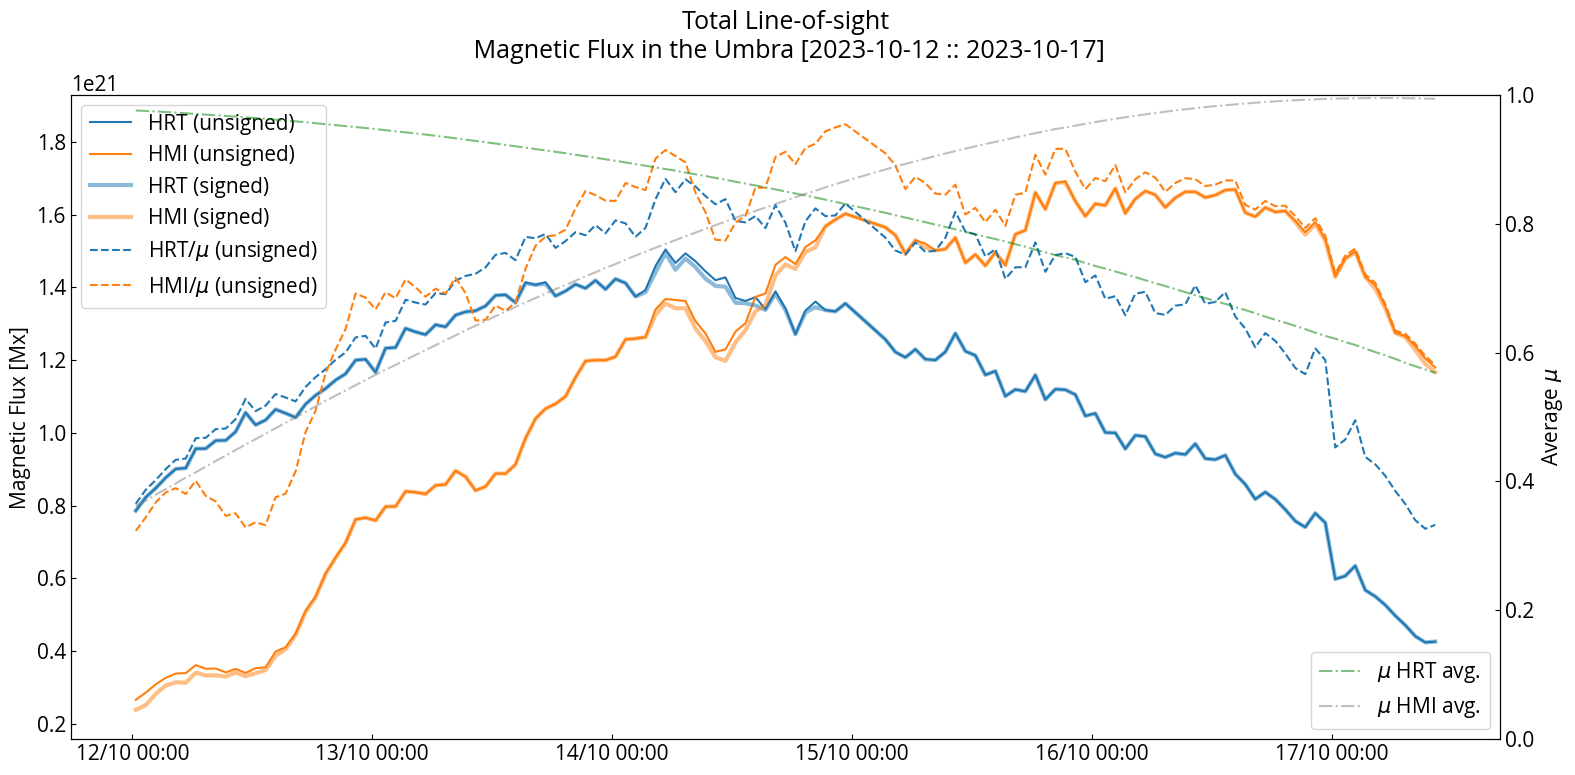

In [125]:
plt.figure(figsize=(16,8))
plt.plot(times,tmp_ichrt_test*hmisize**2,label=r'HRT (unsigned)',color='#1f77b4')
plt.plot(times,tmp_ichmi_test*hmisize**2,label=r'HMI (unsigned)',color='#ff7f0e')

plt.plot(times,tmp_sichrt_test*hmisize**2,label=r'HRT (signed)',color='#1f77b4',linewidth=3,alpha=0.5)
plt.plot(times,tmp_sichmi_test*hmisize**2,label=r'HMI (signed)',color='#ff7f0e',linewidth=3,alpha=0.5)

plt.plot(times,tmp_ichrtmu_test*hmisize**2,label=r'HRT/$\mu$ (unsigned)',color='#1f77b4',linestyle='--')
plt.plot(times,tmp_ichmimu_test*hmisize**2,label=r'HMI/$\mu$ (unsigned)',color='#ff7f0e',linestyle='--')

plt.ylabel('Magnetic Flux [Mx]')
plt.legend(loc='upper left')
ax=plt.gca()
ax2=ax.twinx()

ax2.plot(times,hrt_mus_test,label='$\mu$ HRT avg.', color='green',alpha=0.5,linestyle='-.')
ax2.plot(times,hmi_mus_test,label='$\mu$ HMI avg.', color='grey',alpha=0.5,linestyle='-.')
#ax2.plot(times,hrt_dist,label='HRT Dist [AU]',color='blue',alpha=0.5)
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title(f'Total Line-of-sight\n Magnetic Flux in the Umbra [{times[0].date()} :: {times[-1].date()}]\n')
plt.ylabel(r'Average $\mu$')
plt.xlabel('Time [UTC]')
ax=plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Time [UTC]')

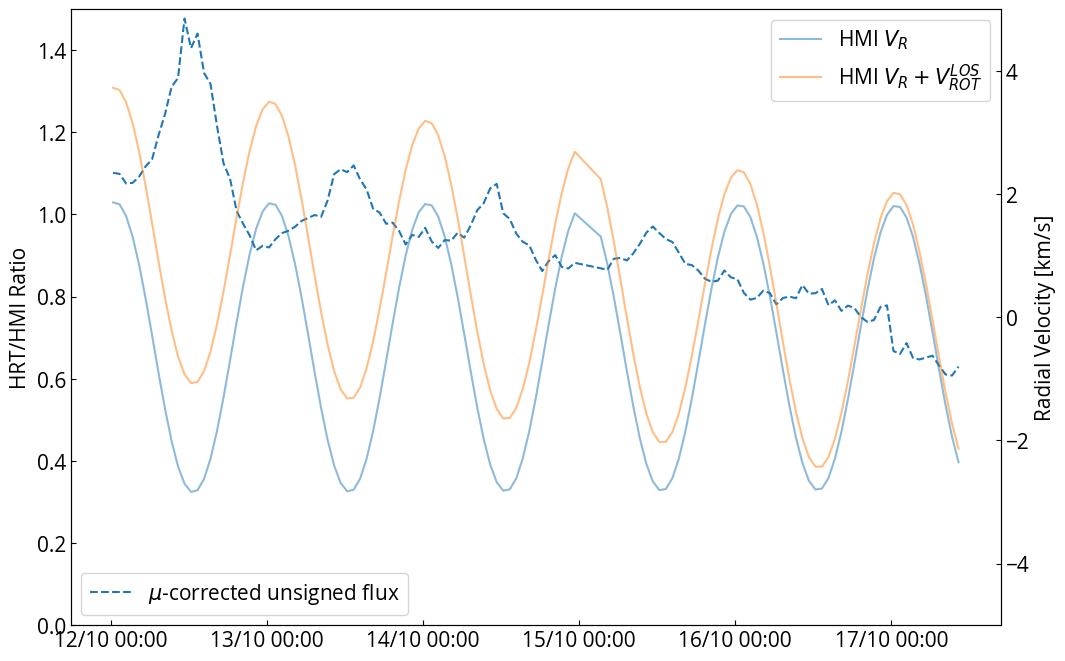

In [126]:
plt.figure(figsize=(12,8))
plt.plot(times,tmp_ichrtmu_test/tmp_ichmimu_test,label=r'$\mu$-corrected unsigned flux',linestyle='--')
#plt.plot(times,tmp_ichrt/tmp_ichmi,label=r'unsigned flux',linestyle='--')
#plt.plot(times,tmp_sichrt/tmp_sichmi,label=r'signed flux',linestyle='--')
plt.ylabel('HRT/HMI Ratio')
plt.legend(loc='lower left')
plt.ylim(0,1.5)
ax=plt.gca()
ax2=ax.twinx()
ax2.plot(times,hmi_vr,label=r'HMI $V_{R}$',alpha=0.5)
ax2.plot(times,hmi_vr_vrot,label=r'HMI $V_{R} + V_{ROT}^{LOS}$',alpha=0.5)
ax2.set_ylabel(r'Radial Velocity [km/s]')
ax2.set_ylim(-5,5)
ax.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.xlabel('Time [UTC]')

In [127]:
np.mean(tmp_ichrtmu_test/tmp_ichmimu_test)

0.9341769231153527

In [128]:
np.std(tmp_ichrtmu_test/tmp_ichmimu_test)/np.sqrt(128)

0.014991348067424864

In [129]:
np.argwhere(np.isnan(tmp_ichrtmu_test))

array([], shape=(0, 1), dtype=int64)

In [53]:
times[29]

datetime.datetime(2023, 10, 13, 5, 19, 59)

In [54]:
times[78]

datetime.datetime(2023, 10, 15, 9, 19, 59)

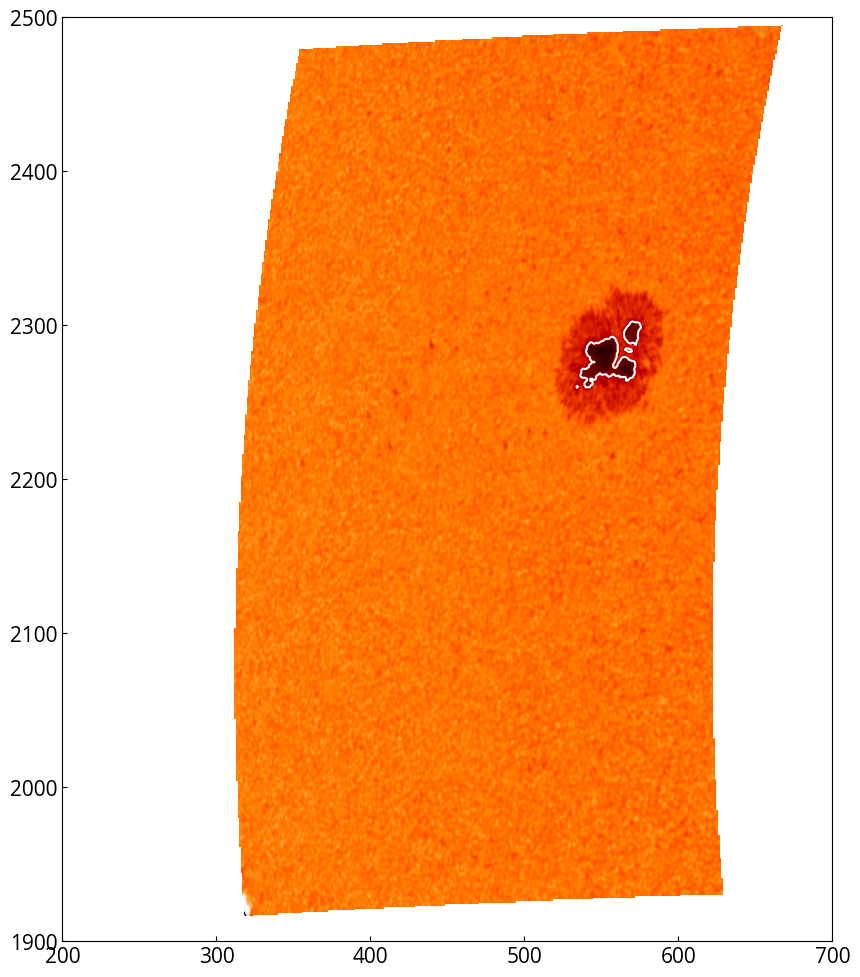

In [58]:
plt.figure(figsize=(12,12))
plt.imshow(hrt_ic_arr[:,:,29],origin="lower",cmap="gist_heat",vmin=0,vmax=1.4)
plt.contour(hrt_ic_arr[:,:,29],levels=[0.55],colors="white")
plt.xlim(200,700)
plt.ylim(1900,2500)
plt.show()

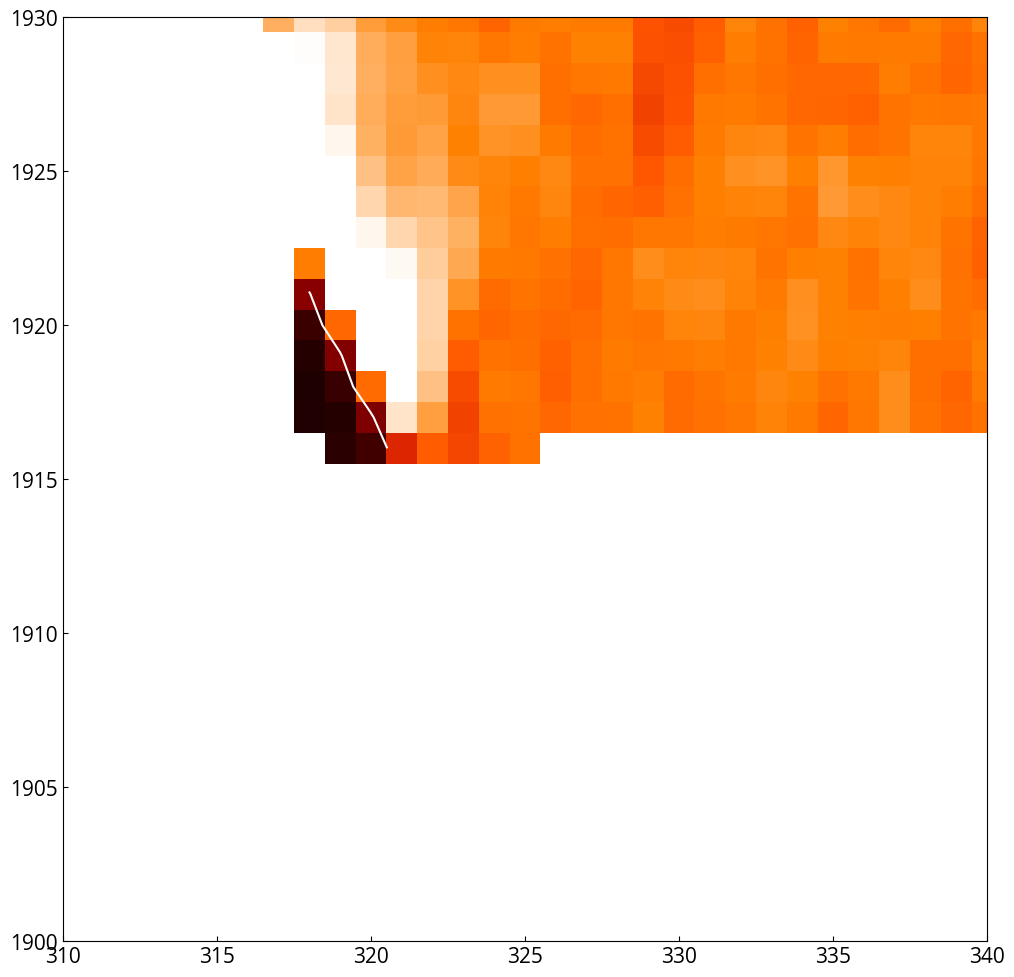

In [60]:
plt.figure(figsize=(12,12))
plt.imshow(hrt_ic_arr[:,:,29],origin="lower",cmap="gist_heat",vmin=0,vmax=1.4)
plt.contour(hrt_ic_arr[:,:,29],levels=[0.55],colors="white")
plt.xlim(310,340)
plt.ylim(1900,1930)
plt.show()

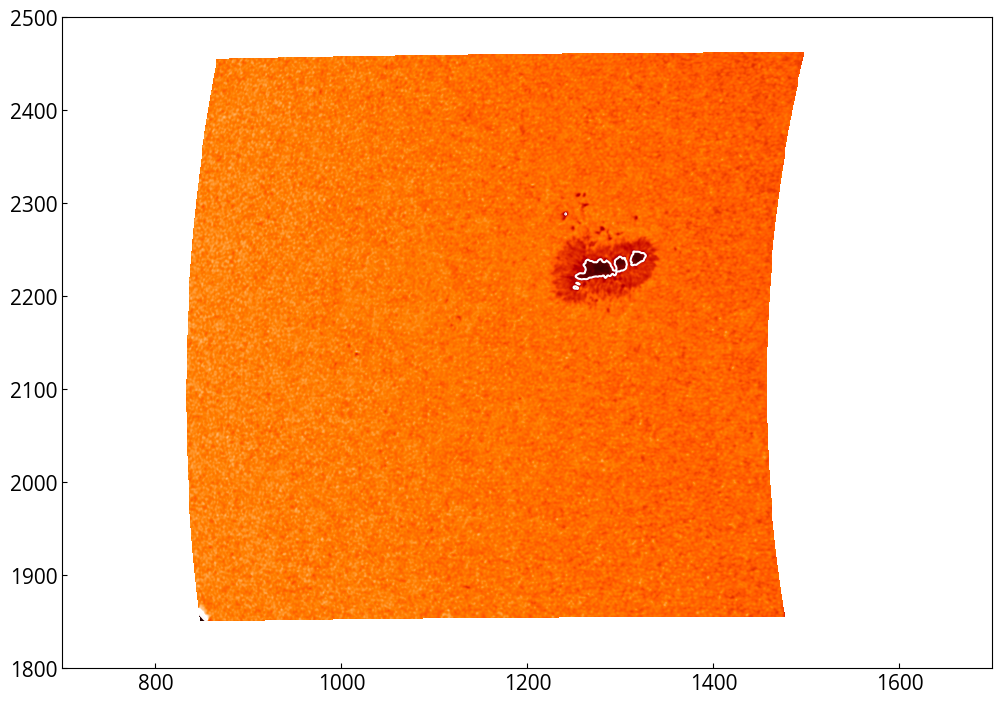

In [112]:
plt.figure(figsize=(12,12))
plt.imshow(hrt_ic_arr[:,:,78],origin="lower",cmap="gist_heat",vmin=0,vmax=1.4)
plt.contour(hrt_ic_arr[:,:,78],levels=[0.55],colors="white")
plt.xlim(700,1700)
plt.ylim(1800,2500)
plt.show()

In [ ]:
# from matplotlib.colors import LinearSegmentedColormap
# import matplotlib as mpl
# cmap = mpl.colormaps['tab20c']
# addition = cmap(np.linspace(0,1,20))[-4:]
# cmap = mpl.colormaps['tab20b']
# tab24 = np.append(cmap(np.linspace(0,1,20)),addition,axis=0)
# # del addition
# tab24 = LinearSegmentedColormap.from_list('tab24',tab24,N=24)

In [114]:
import matplotlib as mpl
import sunpy.visualization.colormaps as cm
magmap = mpl.colormaps['hmimag']

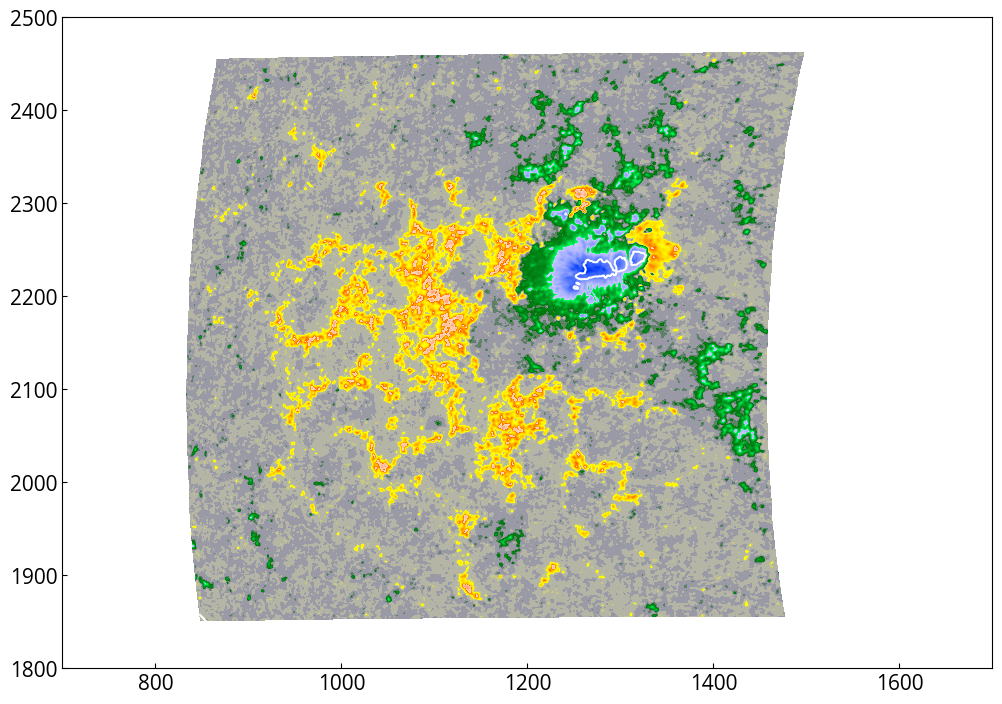

In [115]:
plt.figure(figsize=(12,12))
plt.imshow(hrt_arr[:,:,78],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.contour(hrt_ic_arr[:,:,78],levels=[0.55],colors="white")
plt.xlim(700,1700)
plt.ylim(1800,2500)
plt.show()

In [116]:
hrt_umbra = np.where(hrt_ic_arr[:,:,78]<=0.55)

not_nans = np.where(~np.isnan(hrt_ic_arr[:,:,78]))
bleft = (np.min(not_nans[1]),np.min(not_nans[0]))

index_pairs = np.array(list(zip(hrt_umbra[0], hrt_umbra[1])))
filtered_pairs = index_pairs[(index_pairs[:,0] >= bleft[1]+15) | (index_pairs[:,1] >= bleft[0]+15)]
filtered_indices = (filtered_pairs[:,0],filtered_pairs[:,1])

In [130]:
bleft

(1500, 1803)

In [118]:
np.sum(np.isnan(hrt_arr[:,:,78][filtered_indices]))

0

In [119]:
np.sum(np.isnan(hrt_mu_arr[:,:,78][filtered_indices]))

16

In [122]:
np.where(np.isnan(hrt_mu_arr[:,:,78][filtered_indices]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 20]),)

In [123]:
filtered_indices

(array([1850, 1850, 1850, 1850, 1850, 1850, 1850, 1851, 1851, 1851, 1851,
        1851, 1851, 1851, 1852, 1852, 1852, 1852, 1852, 1852, 1853, 1853,
        1853, 1853, 1854, 1854, 1854, 1855, 1855, 1855, 1856, 1856, 1857,
        2208, 2208, 2209, 2209, 2209, 2209, 2209, 2210, 2210, 2210, 2210,
        2213, 2213, 2214, 2214, 2218, 2219, 2219, 2219, 2219, 2219, 2219,
        2219, 2219, 2219, 2219, 2219, 2220, 2220, 2220, 2220, 2220, 2220,
        2220, 2220, 2220, 2220, 2220, 2220, 2220, 2220, 2220, 2220, 2220,
        2220, 2221, 2221, 2221, 2221, 2221, 2221, 2221, 2221, 2221, 2221,
        2221, 2221, 2221, 2221, 2221, 2221, 2221, 2221, 2221, 2221, 2221,
        2221, 2221, 2221, 2221, 2221, 2222, 2222, 2222, 2222, 2222, 2222,
        2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222,
        2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222, 2222,
        2222, 2222, 2222, 2222, 2222, 2222, 2223, 2223, 2223, 2223, 2223,
        2223, 2223, 2223, 2223, 2223, 

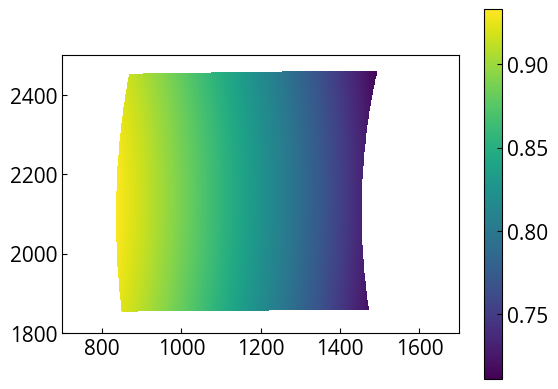

In [121]:
plt.imshow(hrt_mu_arr[:,:,78],origin="lower")
plt.xlim(700,1700)
plt.ylim(1800,2500)
plt.colorbar()